In [1]:
import staintools
import csv
import os
import glob
import re
from pandas import DataFrame, Series
from PIL import Image
import timeit
import time
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
train_paths = ["../data_segments/data_balanced_duplicate_sample/train/Celiac/"]

In [3]:
# get images
images = {}
images_by_folder = {}
for train_path in train_paths:
    images_by_folder[str(train_path)] = []
    files = glob.glob(os.path.join(train_path, '*.jpg'))
    for fl in files:
        flbase = os.path.basename(fl)
        flbase_noext = os.path.splitext(flbase)[0]
        images[flbase_noext]=fl
        images_by_folder[str(train_path)].append(flbase_noext)

In [4]:
# initialize stain and brightness normalizer
stain_normalizer = staintools.StainNormalizer(method='vahadane')
standardizer = staintools.BrightnessStandardizer()

In [5]:
# choose target image
target_image = staintools.read_image("../data_segments/data_balanced_duplicate_sample/valid/Celiac/C06-27_01_1000_2000_0.jpg")
standard_target_image = standardizer.transform(target_image)
stain_normalizer.fit(standard_target_image)

In [6]:
# get destination path
path_change_map = {}

for key in list(images_by_folder.keys()):
    temp = key.replace('..', '/scratch/as3ek')
    path_change_map[key] = temp

159000 C13-68_01_2500_1500_0
159001 C12-62_00_8658_11322_0
159002 C11-54_04_2331_3330_1
159003 C13-65_02_999_2664_1
159004 C12-63_03_5661_6327_0
159005 C12-63_01_3330_12654_0
159006 C10-52_03_5328_7992_0
159007 C04-19_01_2664_1665_0
159008 C14-71_06_3330_3996_0
159009 C11-55_02_4995_1998_0
159010 C15-73_02_1665_5661_1
159011 C07-37_05_3000_3000_0
159012 C08-41_02_4662_999_1
159013 C03-10_02_4329_4662_0
159014 C12-61_04_4329_4329_1
159015 C13-67_04_7000_5000_1
159016 C17-80_01_2000_14500_0
159017 C12-60_04_1500_3500_0
159018 C04-18_02_21978_8658_1
159019 C13-67_02_1665_2331_1
159020 C16-79_01_6660_8325_0
159021 C04-18_03_666_3663_0
159022 C04-17_02_6000_5000_0
159023 C03-12_02_4329_2331_1
159024 C10-50_02_5000_5500_0
159025 C11-56_01_5500_3500_1
159026 C08-41_02_4995_4329_0
159027 C11-57_04_666_1998_0
159028 C16-77_04_4662_9990_0
159029 C09-46_01_5328_2997_1
159030 C16-79_01_9324_8325_1
159031 C03-07_01_1998_2664_0
159032 C12-60_03_5500_4500_0
159033 C11-56_01_7992_7992_0
159034 C15-73_

159282 C17-83_01_7500_5000_0
159283 C16-79_02_11322_4995_1
159284 C16-79_02_10500_4000_0
159285 C08-43_02_4995_5994_0
159286 C12-62_00_11000_2500_0
159287 C14-71_05_10656_1998_0
159288 C12-61_03_666_4995_0
159289 C08-41_02_4329_2997_0
159290 C11-57_02_3996_7659_0
159291 C13-66_01_1998_8658_0
159292 C12-60_02_5500_7000_0
159293 C14-71_07_5328_4662_0
159294 C10-49_04_1332_3663_1
159295 C03-05_05_4995_7992_1
159296 C14-71_06_4329_5994_1
159297 C04-18_04_2000_3500_1
159298 C10-50_02_1998_3330_1
159299 C12-64_02_2997_7992_1
159300 C12-60_02_4329_4329_0
159301 C17-83_01_8991_4662_1
159302 C17-81_01_4000_4000_1
159303 C17-80_02_8500_5000_1
159304 C14-69_00_333_4662_0
159305 C14-70_04_4500_6000_0
159306 C10-49_04_5661_2331_0
159307 C10-50_02_2000_10000_0
159308 C13-66_02_1665_3330_1
159309 C07-40_02_4329_3996_1
159310 C03-05_06_2500_8000_0
159311 C03-12_02_4329_2331_0
159312 C15-73_01_6993_999_0
159313 C12-60_04_2331_6993_0
159314 C13-68_06_1665_4329_1
159315 C13-66_02_1665_1332_0
159316 C03-0

159564 C16-79_01_3996_9324_1
159565 C07-35_03_4662_1665_0
159566 C06-29_03_6327_666_0
159567 C12-64_01b_3996_0_1
159568 C10-51_03_5661_999_1
159569 C12-60_03_5661_4329_0
159570 C12-62_00_11988_3663_1
159571 C03-09_02_500_3000_0
159572 C15-75_03_7992_9657_1
159573 C07-37_06_1998_1665_0
159574 C17-80_01_4662_14652_0
159575 C10-48_01_10000_10000_0
159576 C15-75_02_10500_2000_1
159577 C03-05_05_999_7992_1
159578 C12-60_02_2500_4500_0
159579 C03-05_04_6000_8500_1
159580 C10-47_01_10323_8658_1
159581 C10-52_01_8325_9657_1
159582 C17-83_01_6993_1665_1
159583 C10-47_02_12654_6660_1
159584 C12-62_00_7992_15984_0
159585 C04-19_03_6660_3663_0
159586 C15-75_02_9500_10500_0
159587 C17-81_04_18000_6000_0
159588 C16-77_01_3500_1000_1
159589 C13-66_01_2664_8325_0
159590 C07-35_05_5500_3000_0
159591 C08-41_01_7500_3000_1
159592 C14-71_06_3996_1332_0
159593 C10-47_02_11988_3330_0
159594 C15-75_03_5328_2997_1
159595 C10-47_01_8991_7992_0
159596 C17-81_02_9657_333_0
159597 C12-62_00_7992_6327_1
159598 C16

159846 C17-81_02_2331_4662_1
159847 C11-55_02_2997_5661_1
159848 C04-18_02_29000_10000_0
159849 C06-29_02_3000_2500_0
159850 C12-64_01b_6660_9657_1
159851 C12-63_01_4662_13320_1
159852 C13-67_02_2664_3663_0
159853 C04-18_02_14319_4662_1
159854 C17-80_01_5000_14500_1
159855 C04-19_01_5994_2997_1
159856 C10-51_03_7326_4329_1
159857 C10-52_03_6993_2331_0
159858 C17-81_02_3330_7326_1
159859 C17-81_02_3000_6500_1
159860 C16-79_01_9324_6327_1
159861 C03-10_02_1998_4662_1
159862 C13-68_04_999_1998_0
159863 C12-62_00_3500_5500_1
159864 C03-10_03_10500_1500_0
159865 C13-68_04_1998_3996_0
159866 C12-64_01a_3000_1000_0
159867 C05-26_02_3996_4662_0
159868 C16-77_05_11000_8500_0
159869 C16-77_04_3330_4662_0
159870 C10-49_04_4662_4995_1
159871 C11-57_01_1000_2000_0
159872 C12-60_03_4500_2000_0
159873 C13-65_03_4000_1000_0
159874 C16-77_01_4995_1332_0
159875 C11-57_01_3663_333_0
159876 C14-71_06_6000_3000_0
159877 C17-81_04_16983_999_0
159878 C16-76_01_2331_3330_0
159879 C10-50_02_1665_2664_1
159880 

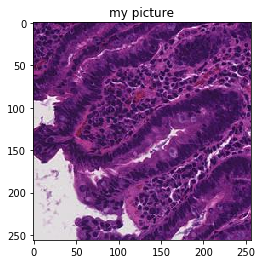

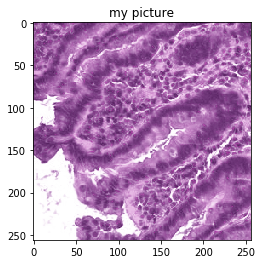

C11-56_01_6500_6500_0 Saved! Count: 160000  
 /scratch/as3ek/data_segments/data_balanced_duplicate_sample/train/Celiac/C11-56_01_6500_6500_0.jpg
160001 C17-81_04_18648_6327_0
160002 C12-60_04_7992_4329_0
160003 C10-52_05_7000_0_1
160004 C17-83_05_6327_7326_1
160005 C12-61_01_3000_2000_1
160006 C12-60_03_9990_7659_1
160007 C12-61_01_5328_1665_1
160008 C09-46_01_5994_2997_0
160009 C04-21_01_6500_3500_0
160010 C15-75_02_11322_5328_1
160011 C14-71_06_6500_5500_1
160012 C03-12_02_2331_5994_0
160013 C04-15_02_3663_2331_1
160014 C12-58_01_1000_3500_0
160015 C12-58_01_7992_3330_0
160016 C10-52_05_7992_2664_1
160017 C10-48_03_3996_8658_1
160018 C04-17_02_6660_6993_0
160019 C13-66_02_3996_8325_1
160020 C06-31_02_6000_500_0
160021 C17-83_05_5661_7992_0
160022 C07-40_03_4000_2500_1
160023 C17-80_01_8500_10500_1
160024 C12-58_02_999_3996_1
160025 C10-48_03_4329_8325_0
160026 C15-73_01_3663_6993_1
160027 C17-80_01_4500_13500_1
160028 C03-05_04_4329_7992_0
160029 C12-60_02_4000_3000_1
160030 C08-43_0

160279 C10-47_01_15318_8658_1
160280 C13-66_01_1500_1000_0
160281 C16-79_01_7659_7659_1
160282 C16-79_01_5000_11500_0
160283 C15-73_01_3500_4500_0
160284 C05-26_02_4000_1000_0
160285 C12-62_00_8000_15000_1
160286 C10-49_03_5994_4329_0
160287 C04-19_01_5500_3500_1
160288 C08-41_01_7659_8658_1
160289 C15-73_04_2000_3500_0
160290 C13-66_01_5000_6000_0
160291 C06-33_04_666_4662_0
160292 C04-19_01_1998_2664_0
160293 C16-79_02_13320_9657_1
160294 C04-18_02_666_2997_1
160295 C16-77_05_1500_2000_1
160296 C12-60_01_8991_4995_1
160297 C12-64_02_3000_4000_0
160298 C10-47_02_10989_333_0
160299 C17-83_04_1998_10323_1
160300 C10-52_03_5994_1998_1
160301 C13-68_02_2331_1998_1
160302 C06-30_04_4500_4500_0
160303 C06-33_04_7500_1500_0
160304 C12-58_01_8500_2000_1
160305 C04-18_02_19000_7500_1
160306 C03-08_01_9324_0_0
160307 C15-75_01_5000_7500_1
160308 C10-49_04_4329_6660_0
160309 C06-30_02_2997_1332_1
160310 C07-34_04_2331_999_0
160311 C03-07_01_9990_5994_1
160312 C13-67_02_2331_4329_1
160313 C12-60_

160561 C14-71_03_4662_3330_1
160562 C15-74_04_3330_4662_1
160563 C14-71_05_13000_2500_1
160564 C16-77_05_6000_9000_1
160565 C11-54_03_5994_7326_0
160566 C17-80_01_6993_6327_0
160567 C04-18_02_16500_7000_0
160568 C14-70_03_10500_9000_0
160569 C06-28_05_4995_5661_0
160570 C14-70_01_3663_5661_1
160571 C17-81_04_8500_6000_1
160572 C11-54_01_7659_7326_1
160573 C14-71_05_3996_3663_1
160574 C13-65_03_2997_1665_1
160575 C12-64_01a_1332_2997_0
160576 C03-07_02_7000_5000_0
160577 C04-15_03_6660_3330_1
160578 C06-30_02_2500_6000_1
160579 C10-47_02_14319_17982_1
160580 C03-05_04_4329_4329_0
160581 C10-48_04_7659_9324_0
160582 C12-60_02_3500_2000_1
160583 C10-48_01_10323_4662_1
160584 C17-80_01_4500_3000_0
160585 C12-61_02_3663_1998_0
160586 C13-68_02_1332_2664_1
160587 C12-60_02_3663_2331_1
160588 C16-76_01_5500_10000_0
160589 C06-30_02_999_7659_0
160590 C16-79_02_10656_9324_0
160591 C13-66_02_1998_11322_0
160592 C12-60_03_10323_4662_0
160593 C03-12_01_2997_2997_1
160594 C11-54_01_4500_4000_0
1605

160843 C15-75_04_4329_7659_1
160844 C10-48_02_2500_2500_1
160845 C11-54_05_1665_4329_1
160846 C11-54_05_9657_2664_0
160847 C10-47_02_14985_13320_1
160848 C04-15_01_10989_4995_1
160849 C09-46_01_2664_14319_1
160850 C04-18_04_3000_5500_1
160851 C13-67_04_5994_6660_0
160852 C14-71_06_6500_4500_1
160853 C12-60_04_8000_6500_0
160854 C10-47_02_13320_1998_1
160855 C14-70_06_2000_6500_0
160856 C10-48_04_9990_3330_1
160857 C10-52_01_8500_5000_1
160858 C10-52_01_8000_1000_0
160859 C17-81_02_5328_4329_0
160860 C03-05_04_2997_8991_0
160861 C07-40_02_999_4329_1
160862 C11-57_02_2997_5661_1
160863 C10-49_02_1998_999_0
160864 C16-77_05_2664_6993_0
160865 C06-28_03_3330_4329_1
160866 C12-62_00_10500_11000_1
160867 C07-35_05_7659_1665_0
160868 C12-60_04_4662_2331_1
160869 C10-47_02_19647_9990_1
160870 C10-47_02_14985_2997_0
160871 C15-75_03_6327_10323_1
160872 C12-60_03_12987_2997_0
160873 C13-65_02_3663_1998_0
160874 C03-07_02_2664_333_0
160875 C16-79_03_2000_1500_1
160876 C04-18_01_3000_1000_0
160877

161125 C15-73_01_4329_6327_1
161126 C17-81_02_8500_1000_0
161127 C15-75_02_9657_4662_1
161128 C07-37_03_6660_3663_0
161129 C10-47_01_7326_5328_0
161130 C07-40_02_3500_2000_1
161131 C13-67_01_5500_1000_1
161132 C10-48_04_7992_4662_0
161133 C04-17_02_3663_4995_1
161134 C06-31_02_6993_2997_0
161135 C06-28_03_3330_0_1
161136 C10-49_03_4662_4329_0
161137 C13-67_01_4000_6000_0
161138 C14-71_05_1000_3500_1
161139 C08-43_02_8000_4500_0
161140 C15-75_04_2997_4662_0
161141 C08-41_01_8658_2664_0
161142 C06-30_04_2500_500_0
161143 C14-71_02_666_999_0
161144 C17-81_04_10323_2997_0
161145 C08-41_01_1665_4995_0
161146 C15-75_04_1665_4995_1
161147 C12-63_03_4995_6327_0
161148 C06-27_04_1998_2997_0
161149 C13-66_02_3663_5328_0
161150 C13-66_03_3663_8658_1
161151 C12-63_03_4995_6660_1
161152 C04-21_02_6000_3000_1
161153 C10-52_01_6660_2997_0
161154 C17-81_02_4500_2500_0
161155 C17-80_01_4000_11500_1
161156 C07-35_05_2664_6660_1
161157 C04-23_01_4995_666_1
161158 C10-49_01_6327_999_1
161159 C17-81_04_566

161408 C17-83_05_3000_4000_0
161409 C10-47_02_19647_8325_0
161410 C10-51_03_3663_3663_1
161411 C12-64_01b_11000_8500_1
161412 C13-68_03_2664_4995_0
161413 C04-18_03_1998_6327_1
161414 C13-66_01_2997_9990_0
161415 C04-19_02_3500_1500_0
161416 C10-52_05_6000_1000_0
161417 C12-64_01b_3000_3500_0
161418 C10-52_03_1665_1998_0
161419 C16-77_04_3663_4995_1
161420 C04-18_02_14652_6993_0
161421 C15-75_02_10989_1998_0
161422 C10-50_02_6327_17649_1
161423 C03-07_01_4662_4662_0
161424 C10-48_02_1998_1332_0
161425 C09-46_01_9000_4000_0
161426 C13-67_02_3996_4995_1
161427 C15-75_04_4000_6500_0
161428 C14-70_04_5994_5661_1
161429 C17-81_04_14985_5994_0
161430 C14-70_03_10323_6993_0
161431 C10-49_04_1998_666_1
161432 C17-81_02_9657_2331_0
161433 C11-56_02_5661_7659_1
161434 C03-05_05_5328_3330_0
161435 C03-07_02_4995_5994_1
161436 C04-15_01_5661_2331_0
161437 C10-48_02_2331_9990_0
161438 C03-10_01_7992_666_0
161439 C14-71_05_3500_4000_1
161440 C04-17_02_1000_4000_1
161441 C16-77_03_3500_3500_0
161442 

161691 C11-57_01_666_1665_1
161692 C16-79_02_3330_5328_0
161693 C04-15_02_5661_4995_1
161694 C10-52_02_7000_4500_1
161695 C14-70_04_5500_6500_0
161696 C10-47_02_7992_6660_1
161697 C17-83_05_6660_3996_0
161698 C03-07_01_5661_5328_1
161699 C12-60_03_6660_5661_1
161700 C03-12_03_1332_2664_1
161701 C13-66_01_2997_3996_1
161702 C14-71_05_500_3500_1
161703 C10-48_05_3996_5328_0
161704 C17-81_02_6993_3330_0
161705 C10-51_03_12654_7326_1
161706 C08-43_01_1500_1000_1
161707 C16-79_03_3000_2500_1
161708 C10-47_02_9990_1332_0
161709 C12-60_03_10323_7326_1
161710 C12-58_03_2331_2331_1
161711 C03-10_05_1665_1998_1
161712 C11-57_04_7659_2664_1
161713 C14-70_03_2500_6000_1
161714 C10-47_01_2000_4500_1
161715 C10-48_04_8000_8500_1
161716 C13-66_01_4662_10656_0
161717 C17-81_04_2331_3663_0
161718 C08-43_02_9324_4329_0
161719 C17-83_01_8500_4500_0
161720 C12-62_00_8000_16500_1
161721 C17-83_01_4329_4329_0
161722 C16-77_05_5661_8991_1
161723 C17-83_01_3996_4329_0
161724 C08-43_02_5994_10989_0
161725 C12-

161973 C10-48_01_7326_8991_1
161974 C17-83_02_6500_2500_0
161975 C06-31_01_3000_3000_1
161976 C04-15_02_7000_3500_1
161977 C09-46_01_2000_10500_1
161978 C13-68_01_1000_11000_0
161979 C15-73_02_1332_3996_1
161980 C13-66_01_4329_666_0
161981 C09-46_01_8325_5328_1
161982 C16-79_02_10000_2500_1
161983 C17-81_04_3996_3330_0
161984 C16-79_02_1665_4995_0
161985 C04-18_03_7000_6500_1
161986 C16-77_03_8658_2997_0
161987 C04-19_03_6500_4500_0
161988 C12-64_01a_6500_1500_0
161989 C17-83_01_4500_10500_1
161990 C11-54_03_7326_999_1
161991 C12-62_00_9324_13320_0
161992 C10-50_02_2331_2997_1
161993 C12-60_01_14500_4500_1
161994 C07-35_05_4329_4662_0
161995 C06-33_05_6660_666_0
161996 C04-21_01_2500_2000_0
161997 C13-68_01_1500_12000_0
161998 C10-47_02_15318_14319_1
161999 C15-75_03_1500_7000_0
162000 C03-12_02_2331_3663_1
162001 C06-30_04_2664_1332_0
162002 C16-77_03_1332_3996_1
162003 C06-33_01_3663_5661_0
162004 C16-77_05_6993_9324_0
162005 C17-81_02_2997_8658_0
162006 C04-19_02_1500_1000_0
162007 

162256 C04-21_01_2664_2664_1
162257 C11-54_03_8991_5661_0
162258 C06-33_01_2000_1000_1
162259 C16-77_03_1665_1998_1
162260 C16-77_05_9657_12654_0
162261 C10-48_04_5500_7000_0
162262 C10-52_05_4995_7659_0
162263 C03-05_04_7000_3500_0
162264 C09-46_02_3663_3330_0
162265 C10-52_03_6660_1998_0
162266 C10-52_01_3663_11322_0
162267 C12-60_03_9990_10323_0
162268 C03-05_06_6660_6327_0
162269 C17-81_02_2664_7992_0
162270 C10-49_04_7326_5994_1
162271 C12-61_03_2997_4662_1
162272 C16-77_01_4329_7659_1
162273 C10-48_01_4329_5994_1
162274 C10-49_02_4662_5994_1
162275 C09-46_01_8991_7326_1
162276 C15-75_02_1332_9990_0
162277 C14-70_03_4995_1998_0
162278 C10-47_01_15651_4329_1
162279 C12-60_04_4995_7326_1
162280 C11-57_02_4329_5661_1
162281 C15-74_05_500_3000_0
162282 C05-26_02_4662_4662_1
162283 C17-83_05_9324_6993_0
162284 C16-79_01_6660_4662_1
162285 C07-37_06_1998_666_0
162286 C07-34_05_999_666_0
162287 C10-47_01_6500_5000_0
162288 C07-40_01_7659_4329_1
162289 C13-67_04_4995_6993_1
162290 C13-68_

162539 C04-19_02_1665_2664_1
162540 C03-08_02_4662_1998_1
162541 C04-21_02_7500_3500_0
162542 C12-61_02_2331_999_1
162543 C04-15_02_4500_5000_0
162544 C08-43_02_8000_9500_1
162545 C10-49_04_7500_4500_1
162546 C15-75_02_12987_6660_1
162547 C10-48_01_8991_1998_0
162548 C04-24_00_1500_2000_0
162549 C12-60_04_2331_4995_0
162550 C12-63_03_7659_8325_0
162551 C03-07_01_4500_2000_0
162552 C06-29_03_2331_3663_1
162553 C15-75_03_7000_6500_1
162554 C12-63_03_2664_6993_0
162555 C07-37_05_999_1998_1
162556 C11-54_03_5500_2500_1
162557 C08-41_01_6500_1500_1
162558 C08-41_02_6327_4329_1
162559 C16-79_01_1665_6660_0
162560 C12-64_01b_12654_9657_1
162561 C11-56_02_3996_3996_0
162562 C17-81_05_4500_7000_1
162563 C15-75_03_7000_4000_0
162564 C17-81_02_10656_666_0
162565 C14-70_04_5661_8658_0
162566 C16-76_01_6993_12654_0
162567 C06-30_03_3996_1332_0
162568 C06-29_02_6993_1332_0
162569 C17-81_04_10323_2664_0
162570 C13-66_03_4329_6993_1
162571 C04-15_02_7992_5328_1
162572 C08-43_02_10323_6327_0
162573 C14

162821 C12-64_01b_1998_3996_1
162822 C12-64_01b_15651_4329_1
162823 C10-47_02_14319_6993_0
162824 C14-70_06_3663_1665_0
162825 C12-58_01_5994_6993_0
162826 C04-17_01_6500_3000_1
162827 C10-47_01_2500_5500_1
162828 C13-67_01_8500_3000_1
162829 C06-33_03_1665_3330_0
162830 C04-18_04_1332_4662_1
162831 C10-52_04_5994_1998_0
162832 C06-31_01_6660_0_0
162833 C04-15_01_333_1998_1
162834 C10-50_02_5994_3996_1
162835 C08-43_02_12654_6327_0
162836 C16-79_01_8658_9990_0
162837 C10-49_04_6000_4500_0
162838 C16-76_02_1332_3996_1
162839 C12-62_00_4500_4500_1
162840 C15-73_04_500_2500_1
162841 C08-41_01_8325_3663_1
162842 C08-43_01_2331_5994_0
162843 C03-07_01_4000_1000_0
162844 C10-52_01_8325_999_1
162845 C10-49_04_7659_7326_0
162846 C13-65_04_2000_4500_1
162847 C13-66_02_1998_11322_1
162848 C08-41_02_4000_3500_0
162849 C10-49_04_3500_4500_1
162850 C14-71_03_4662_0_0
162851 C12-61_03_1665_4662_0
162852 C13-68_02_6327_6327_1
162853 C16-79_01_3996_7992_1
162854 C14-71_07_1665_3663_0
162855 C03-05_05_

163104 C17-83_01_8000_5500_1
163105 C14-71_04_1500_5500_1
163106 C08-41_02_5661_5328_1
163107 C16-77_01_3500_8500_1
163108 C12-61_02_4995_666_1
163109 C12-64_01b_11500_4500_0
163110 C14-70_02_1500_1500_0
163111 C04-18_02_3500_2000_0
163112 C14-71_05_6500_2000_0
163113 C11-54_03_7000_5500_0
163114 C08-43_02_13500_7500_0
163115 C12-60_04_3500_3500_0
163116 C10-48_01_9324_9990_0
163117 C14-71_04_3663_3330_1
163118 C09-46_02_999_999_1
163119 C12-60_01_10000_7000_1
163120 C04-23_04_6993_2997_1
163121 C04-17_01_2500_2000_0
163122 C16-79_02_2664_2664_1
163123 C13-68_05_1332_4329_1
163124 C12-60_01_14985_4995_1
163125 C11-54_05_4995_5328_1
163126 C17-81_02_6000_6000_0
163127 C11-54_03_7500_5000_0
163128 C15-75_04_3663_3663_1
163129 C15-74_01_5994_2997_0
163130 C07-37_03_2664_1998_1
163131 C17-83_05_7659_1998_0
163132 C10-48_01_11655_6993_1
163133 C15-73_04_0_2000_1
163134 C11-54_03_6500_3000_0
163135 C05-26_02_2000_1000_1
163136 C16-79_01_5661_9657_1
163137 C12-63_03_5994_9990_0
163138 C13-66_

163386 C06-30_03_2664_1998_0
163387 C12-60_03_1665_4995_1
163388 C17-81_01_3330_1665_1
163389 C16-79_03_6993_5994_0
163390 C15-73_03_1998_4329_0
163391 C10-52_05_3663_8325_0
163392 C06-30_02_1665_2331_1
163393 C17-81_05_5661_1665_1
163394 C16-79_02_14652_7326_1
163395 C04-18_02_6327_3996_0
163396 C11-56_03_1998_3330_0
163397 C05-26_03_4329_3663_0
163398 C04-15_02_6500_3500_1
163399 C10-48_01_13500_5000_0
163400 C17-81_01_3663_3996_1
163401 C06-32_04_3663_2664_1
163402 C09-46_01_10000_10500_0
163403 C12-64_01a_7500_5000_1
163404 C06-30_02_2000_7000_1
163405 C08-41_02_7500_2500_1
163406 C12-64_01b_13653_4995_0
163407 C10-52_01_5500_1500_1
163408 C17-83_01_5661_2664_0
163409 C04-21_01_3663_3663_0
163410 C16-76_01_5000_10500_1
163411 C04-18_02_28500_12500_0
163412 C09-46_01_9500_12500_1
163413 C17-81_04_14652_666_1
163414 C12-62_00_10000_1500_1
163415 C06-29_02_5994_1665_1
163416 C04-18_02_27639_9990_1
163417 C12-62_00_11000_7000_0
163418 C12-61_03_5500_7500_1
163419 C15-75_03_4500_5500_0


163668 C17-83_02_1500_4000_0
163669 C13-65_03_2000_2500_0
163670 C10-48_04_9657_2997_0
163671 C09-46_02_3000_4000_0
163672 C12-61_04_1332_3663_1
163673 C16-77_05_1332_4995_0
163674 C13-68_05_2331_7326_0
163675 C12-58_03_2664_5328_0
163676 C12-58_01_1000_5500_1
163677 C11-57_04_9657_3996_1
163678 C16-79_02_666_1665_1
163679 C03-10_03_5994_333_0
163680 C13-67_02_3663_3663_0
163681 C10-48_04_9324_5328_1
163682 C12-60_03_4000_1000_0
163683 C12-61_04_1665_6993_1
163684 C08-43_02_13500_7500_1
163685 C05-26_02_2500_3000_0
163686 C14-71_03_7500_3500_1
163687 C08-43_02_8991_2997_0
163688 C16-77_05_12654_9657_0
163689 C10-47_01_4329_5661_1
163690 C06-27_04_3000_1000_1
163691 C10-48_04_6000_4000_0
163692 C17-83_01_7326_1665_1
163693 C04-15_02_1332_333_1
163694 C16-79_02_14319_6660_1
163695 C03-07_02_333_2664_0
163696 C11-57_02_4329_1332_0
163697 C10-48_03_6000_5000_0
163698 C11-57_02_1665_5328_0
163699 C14-71_06_5000_7000_1
163700 C10-52_05_999_5994_1
163701 C06-30_02_2500_1500_0
163702 C12-61_01

KeyboardInterrupt: 

In [7]:
count = 0
for key in images_by_folder.keys():
    images = list(images_by_folder[key])
#     images.reverse()
    for value in images:
        count += 1
        if count < 159000:
            continue
#         print(key)
#         print(value)
        print (str(count) + ' ' + str(value))
        source_img_path = str(key) + str(value) + '.jpg'
        dest_img_path = str(path_change_map[key]) + str(value) + '.jpg'
#         print(source_img_path)
        img = staintools.read_image(source_img_path)
        if (np.mean(img) > 240) or (np.mean(img) < 10):
            continue
        # standardize brightness
        img_standard = standardizer.transform(img)
        # transform the images
        img_normalized = stain_normalizer.transform(img_standard)
        # write image to path

#             plt.imshow(img)
#             plt.title('my picture')
#             plt.show()
#             plt.imshow(img_normalized)
#             plt.title('my picture')
#             plt.show()

        if (count % 10000 == 0):
            plt.imshow(img)
            plt.title('my picture')
            plt.show()
            plt.imshow(img_normalized)
            plt.title('my picture')
            plt.show()
            print(value + ' Saved! Count: ' + str(count) + '  \n ' + str(dest_img_path))
        cv2.imwrite(os.path.normpath(dest_img_path), img_normalized)

In [ ]:
path_change_map